# R Recess
By: Victoria Smith

## Overview
### Purpose
The purpose of this report is to determine if the wait times from two Disney Rides: Spaceship Earth and Soarin can be used to represent one another.
### Research Question
Is there a correlation between the wait times of Spaceship Earth and Soarin'Around the World?
    
    This question is asked to gain insight on how the wait times at Disney may affect one another.

### Environment Set Up

Version:

In [6]:
import rpy2
print(rpy2.__version__)

3.4.2


Required Packages used:

In [7]:
import pandas as ps
from matplotlib import pyplot as plt
import numpy as np
import os

Data File Loaded in:

In [8]:
os.environ['R_HOME'] = r"C:\Users\lemon\anaconda3\envs\datainemat\Lib\R"
print(os.environ['R_HOME'])

C:\Users\lemon\anaconda3\envs\datainemat\Lib\R


R objects put into Pyton Variables:

In [9]:
import rpy2.robjects as robjects

In [10]:
r_cor= robjects.r["cor"]
r_lm = robjects.r["lm"]
r_predict = robjects.r["predict"]
r_plot = robjects.r["plot"]
r_summary = robjects.r["summary"]

#### Loading in Data:

In [11]:
waits = ps.read_csv("disney_wait_times.csv")
waits.head

<bound method NDFrame.head of          date        datetime  soarin_wait  spaceship_wait
0    1/1/2020   1/1/2020 8:43         10.0             5.0
1    1/1/2020   1/1/2020 8:50         10.0             5.0
2    1/1/2020   1/1/2020 8:57         10.0             5.0
3    1/1/2020   1/1/2020 9:08         25.0          -999.0
4    1/1/2020   1/1/2020 9:15         25.0          -999.0
..        ...             ...          ...             ...
518  1/5/2020  1/5/2020 20:29         35.0            10.0
519  1/5/2020  1/5/2020 20:36         35.0            10.0
520  1/5/2020  1/5/2020 20:43         20.0            10.0
521  1/5/2020  1/5/2020 20:50         15.0            10.0
522  1/5/2020  1/5/2020 20:57         15.0            10.0

[523 rows x 4 columns]>

### Graph of Soarin and Spaceship Earth Wait Times

Histogram of wait times(in minutes):

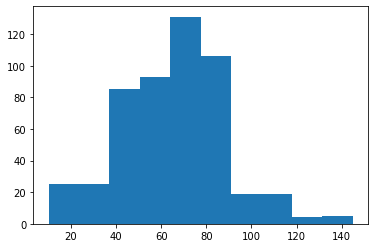

In [12]:
soaring_hist = plt.hist(waits['soarin_wait'])

Histogram of spaceship wait times (in minutes):

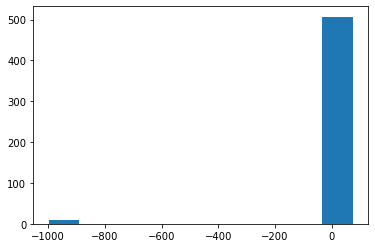

In [13]:
spaceship_hist = plt.hist(waits['spaceship_wait'])

Removing negative wait times from Spaceship Earth wait times:

In [14]:
waits = waits.replace (-999.0, np.nan)

Replotting Spaceship Earth histogram (without negative wait times):

Notice there are wait times ranging from 0-75 mins.

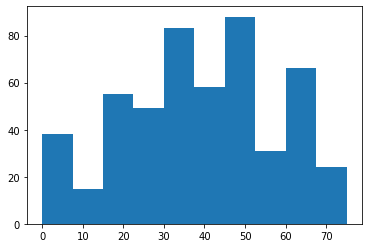

In [15]:
spaceship_hist = plt.hist(waits['spaceship_wait'])

### Bivariate Distribution Plot of Spaceship Earth and Soarin

Scatter Plot:

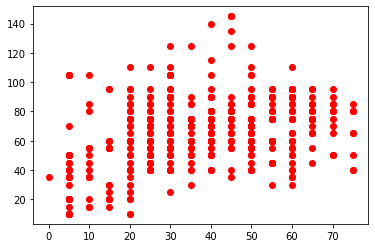

In [16]:
fig, ax0 = plt.subplots()
ax0 = plt.scatter(waits['spaceship_wait'], waits['soarin_wait'],color='red')
plt.show()

### Running Correlation
Finding the best number that shows the relationship between Soarin and Spaceship Earth

Coverting from PY to readable R language:

In [17]:
soarin_r = robjects.FloatVector(waits['soarin_wait'])
spaceship_r = robjects.FloatVector(waits['spaceship_wait'])

Calculating Pearson Correlation using r_cor:

In [18]:
wait_cor = r_cor (soarin_r, spaceship_r, method = "pearson", use = "pairwise.complete.obs")

Pearson R Value:

In [19]:
wait_cor[0]

0.36022276532483044

R value squared:

In [20]:
wait_cor[0] ** 2

0.12976044065826786

There is a 12.98% correlation.

In [21]:
simple_form = robjects.Formula("soarin ~ spaceship")
simple_form.environment['soarin'] = soarin_r
simple_form.environment['spaceship'] = spaceship_r

In [22]:
wait_lm = r_lm(formula = simple_form)
type(wait_lm)

rpy2.robjects.vectors.ListVector

In [23]:
wait_lm

<rpy2.robjects.vectors.ListVector object at 0x00000283BEBE0340> [RTYPES.VECSXP]
R classes: ('lm',)
[FloatSexp..., FloatSexp..., FloatSexp..., IntSexpVe..., ..., ListSexpV..., LangSexpV..., LangSexpV..., ListSexpV...]
  coefficients: <class 'rpy2.robjects.vectors.FloatVector'>
  <rpy2.robjects.vectors.FloatVector object at 0x00000283BEC7D900> [RTYPES.REALSXP]
R classes: ('numeric',)
[48.696118, 0.457380]
  residuals: <class 'rpy2.robjects.vectors.FloatVector'>
  <rpy2.robjects.vectors.FloatVector object at 0x00000283BEC7DA00> [RTYPES.REALSXP]
R classes: ('numeric',)
[-40.983020, -40.983020, -40.983020, -13.696118, ..., -18.269922, -33.269922, -38.269922, -38.269922]
  effects: <class 'rpy2.robjects.vectors.FloatVector'>
  <rpy2.robjects.vectors.FloatVector object at 0x00000283C193C900> [RTYPES.REALSXP]
R classes: ('numeric',)
[-1472.939920, 186.325375, -36.415494, -8.681639, ..., -14.149349, -29.149349, -34.149349, -34.149349]
  rank: <class 'rpy2.robjects.vectors.IntVector'>
  <rpy2.robjects.vectors.IntVector object at 0x00000283BEBD28C0> [RTYPES.INTSXP]
R classes: ('integer',)
[2]
...
<rpy2.robjects.vectors.ListVector object at 0x00000283BEBE0340> [RTYPES.VECSXP]
R classes: ('lm',)
[FloatSexp..., FloatSexp..., FloatSexp..., IntSexpVe..., ..., ListSexpV..., LangSexpV..., LangSexpV..., ListSexpV...]
  qr: <class 'rpy2.robjects.language.LangVector'>
  Rlang( (function (formula, data, subset, weights, na.action, method = "qr",  )
  df.residual: <class 'rpy2.robjects.Formula'>
  <rpy2.robjects.Formula object at 0x00000283BEB79AC0> [RTYPES.LANGSXP]
R classes: ('terms', 'formula')
<rpy2.robjects.vectors.ListVector object at 0x00000283BEBE0340> [RTYPES.VECSXP]
R classes: ('lm',)
[FloatSexp..., FloatSexp..., FloatSexp..., IntSexpVe..., ..., ListSexpV..., LangSexpV..., LangSexpV..., ListSexpV...]

Intercept and Slope:

In [24]:
wait_lm[0]

48.696118,0.457380


In [25]:
wait_lm.rx2("coefficients")

48.696118,0.457380


In [26]:
r_summary(wait_lm)

<rpy2.robjects.vectors.ListVector object at 0x00000283BEC4B540> [RTYPES.VECSXP]
R classes: ('summary.lm',)
[LangSexpV..., LangSexpV..., FloatSexp..., FloatSexp..., ..., FloatSexp..., FloatSexp..., FloatSexp..., IntSexpVe...]
  call: <class 'rpy2.robjects.language.LangVector'>
  Rlang( (function (formula, data, subset, weights, na.action, method = "qr",  )
  terms: <class 'rpy2.robjects.Formula'>
  <rpy2.robjects.Formula object at 0x00000283BEC7D9C0> [RTYPES.LANGSXP]
R classes: ('terms', 'formula')
  residuals: <class 'rpy2.robjects.vectors.FloatVector'>
  <rpy2.robjects.vectors.FloatVector object at 0x00000283BEC7D8C0> [RTYPES.REALSXP]
R classes: ('numeric',)
[-40.983020, -40.983020, -40.983020, -13.696118, ..., -18.269922, -33.269922, -38.269922, -38.269922]
  coefficients: <class 'rpy2.robjects.vectors.FloatMatrix'>
  <rpy2.robjects.vectors.FloatMatrix object at 0x00000283BEC84580> [RTYPES.REALSXP]
R classes: ('matrix',)
[48.696118, 0.457380, 2.234515, 0.053184, 21.792703, 8.599884, 0.000000, 0.000000]
...
  sigma: <class 'rpy2.robjects.vectors.FloatVector'>
  <rpy2.robjects.vectors.FloatVector object at 0x00000283BEC84240> [RTYPES.REALSXP]
R classes: ('numeric',)
[0.128006]
  df: <class 'rpy2.robjects.vectors.FloatVector'>
  <rpy2.robjects.vectors.FloatVector object at 0x00000283BEBDC2C0> [RTYPES.REALSXP]
R classes: ('numeric',)
[73.958001, 1.000000, 496.000000]
  r.squared: <class 'rpy2.robjects.vectors.FloatMatrix'>
  <rpy2.robjects.vectors.FloatMatrix object at 0x00000283BEC80140> [RTYPES.REALSXP]
R classes: ('matrix',)
[0.010637, -0.000228, -0.000228, 0.000006]
  adj.r.squared: <class 'rpy2.robjects.vectors.IntVector'>
  <rpy2.robjects.vectors.IntVector object at 0x00000283BEC80580> [RTYPES.INTSXP]
R classes: ('omit',)
[4, 5, 6, 7, ..., 451, 469, 484, 489]

### Analysis
The correlation percentage between the two rides is 12.98%. There is an intercept of (0,48.69) and a slope of 0.46/1.

### Conclusion
From this model it is safe to say that the ride, Spaceship Earth cannot be used to predict the wait time on the Soarin ride. With a correlation of 12.98% between the two wait times it is proven that there is not a strong correlation between them. Therefore, this is also true vice versa.

This model also shows that there is a slope of 0.46. The slope represents that every time the Soarin wait time moves along the x-axis by 1 minute, there is an increase of 0.46. Just like the correlation test, the slope shows that Spaceship Earth cannot be used to predict the wait time on Soarin (and vice versa). This can be visualized by drawing the slope line on the scatter plot. It would then be clear that the points on the plot would not follow along the slope line which shows the two rides cannot be used to predict one another. If the points on the plot did follow along the slope line then it would be safe to say that the two rides CAN be used to represent one another.